<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#X.-Functions" data-toc-modified-id="X.-Functions-1">X. Functions</a></span><ul class="toc-item"><li><span><a href="#X.1-missing_values_table()" data-toc-modified-id="X.1-missing_values_table()-1.1">X.1 missing_values_table()</a></span></li><li><span><a href="#X.2-drop_cols()" data-toc-modified-id="X.2-drop_cols()-1.2">X.2 drop_cols()</a></span></li></ul></li><li><span><a href="#X.3-outliers_to_null()" data-toc-modified-id="X.3-outliers_to_null()-2">X.3 outliers_to_null()</a></span></li><li><span><a href="#1.-Data" data-toc-modified-id="1.-Data-3">1. Data</a></span></li><li><span><a href="#2.-Pearson-Correlation" data-toc-modified-id="2.-Pearson-Correlation-4">2. Pearson Correlation</a></span></li><li><span><a href="#3.-Outliers" data-toc-modified-id="3.-Outliers-5">3. Outliers</a></span><ul class="toc-item"><li><span><a href="#3.1-interest-rate" data-toc-modified-id="3.1-interest-rate-5.1">3.1 interest rate</a></span></li><li><span><a href="#3.2-dti" data-toc-modified-id="3.2-dti-5.2">3.2 dti</a></span></li><li><span><a href="#3.3-loan-amount" data-toc-modified-id="3.3-loan-amount-5.3">3.3 loan amount</a></span></li><li><span><a href="#3.4-annual-income" data-toc-modified-id="3.4-annual-income-5.4">3.4 annual income</a></span></li><li><span><a href="#3.5-fico-score" data-toc-modified-id="3.5-fico-score-5.5">3.5 fico score</a></span></li><li><span><a href="#3.6-Remove-Outliers" data-toc-modified-id="3.6-Remove-Outliers-5.6">3.6 Remove Outliers</a></span></li></ul></li><li><span><a href="#4.-Feature-Engineering" data-toc-modified-id="4.-Feature-Engineering-6">4. Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#4.1-Categorical-Variables" data-toc-modified-id="4.1-Categorical-Variables-6.1">4.1 Categorical Variables</a></span></li><li><span><a href="#4.2-Train/Test-Split" data-toc-modified-id="4.2-Train/Test-Split-6.2">4.2 Train/Test Split</a></span></li><li><span><a href="#4.3-Impute-Missing-Values" data-toc-modified-id="4.3-Impute-Missing-Values-6.3">4.3 Impute Missing Values</a></span></li></ul></li><li><span><a href="#5.-Short-Summary" data-toc-modified-id="5.-Short-Summary-7">5. Short Summary</a></span></li></ul></div>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## X. Functions

### X.1 missing_values_table()

In [2]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

### X.2 drop_cols()

In [3]:
def drop_cols(cols):
    df.drop(labels=cols, axis=1, inplace=True)

## X.3 outliers_to_null()

In [4]:
def outliers_to_null(variable, df):
    for x in [variable]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

## 1. Data

The data has been cleaned in Part1 in some ways, we will load the data from part1 directly and check some basic information.

In [5]:
df = pd.read_pickle('../Data/part1_clean_data_16_18.pkl')

In [6]:
df.sample(5)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,all_util,inq_fi,total_cu_tl,inq_last_12m,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,IssueDate,fico_score
2032971,6600.0,36,21.49,250.32,D5,MORTGAGE,50000.0,Source Verified,Fully Paid,home_improvement,...,99.0,1.0,0.0,2.0,113.0,330.0,3.0,1.0,2016-07-01,667.0
1018520,35000.0,36,15.31,1218.61,C5,OWN,650000.0,Verified,Fully Paid,home_improvement,...,70.0,0.0,0.0,3.0,160.0,267.0,3.0,0.0,2016-03-01,672.0
1945998,10000.0,36,10.99,327.34,B4,OWN,52000.0,Source Verified,Charged Off,credit_card,...,80.0,1.0,0.0,1.0,168.0,329.0,4.0,0.0,2016-09-01,672.0
669274,19000.0,36,10.75,619.79,B4,MORTGAGE,65000.0,Verified,Fully Paid,debt_consolidation,...,67.0,0.0,0.0,1.0,132.0,126.0,2.0,0.0,2016-06-01,702.0
682545,35000.0,36,15.31,1218.61,C5,MORTGAGE,198000.0,Verified,Charged Off,debt_consolidation,...,68.0,0.0,2.0,5.0,128.0,226.0,4.0,1.0,2016-06-01,667.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517579 entries, 421101 to 2260697
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             517579 non-null  float64       
 1   term                  517579 non-null  int8          
 2   int_rate              517579 non-null  float64       
 3   installment           517579 non-null  float64       
 4   sub_grade             517579 non-null  object        
 5   home_ownership        517579 non-null  object        
 6   annual_inc            517579 non-null  float64       
 7   verification_status   517579 non-null  object        
 8   loan_status           517579 non-null  object        
 9   purpose               517579 non-null  object        
 10  addr_state            517579 non-null  object        
 11  dti                   517579 non-null  float64       
 12  open_acc              517579 non-null  float64      

In [8]:
missing_values_table(df)

Your selected dataframe has 38 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,type
il_util,69882,13.5,float64
mths_since_rcnt_il,13639,2.6,float64
mo_sin_old_il_acct,13639,2.6,float64


Some variables were not inspected fully in part 1, which are also not useful in the analysis(mostly they are post loan information), we drop them here. 

In [9]:
drop_list = ['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
             'open_rv_24m', 'inq_last_12m','mths_since_rcnt_il','open_rv_12m', ]

In [10]:
drop_cols(drop_list)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517579 entries, 421101 to 2260697
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             517579 non-null  float64       
 1   term                  517579 non-null  int8          
 2   int_rate              517579 non-null  float64       
 3   installment           517579 non-null  float64       
 4   sub_grade             517579 non-null  object        
 5   home_ownership        517579 non-null  object        
 6   annual_inc            517579 non-null  float64       
 7   verification_status   517579 non-null  object        
 8   loan_status           517579 non-null  object        
 9   purpose               517579 non-null  object        
 10  addr_state            517579 non-null  object        
 11  dti                   517579 non-null  float64       
 12  open_acc              517579 non-null  float64      

## 2. Pearson Correlation 

For Pearson Correlation, we only use continuous variables.

In [12]:
list_float = df.select_dtypes(exclude=['object']).columns

In [13]:
list_float

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_bal_il', 'il_util', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc',
       'pub_rec_bankruptcies', 'IssueDate', 'fico_score'],
      dtype='object')

Some variables not useful for Person correlation check, E.g., $IssueDate$

In [14]:
list_float = ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti', 
              'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'total_bal_il', 
              'il_util', 'max_bal_bc', 'all_util', 'inq_fi','total_cu_tl','mo_sin_old_il_acct',
              'mo_sin_old_rev_tl_op', 'mort_acc','pub_rec_bankruptcies', 'fico_score']

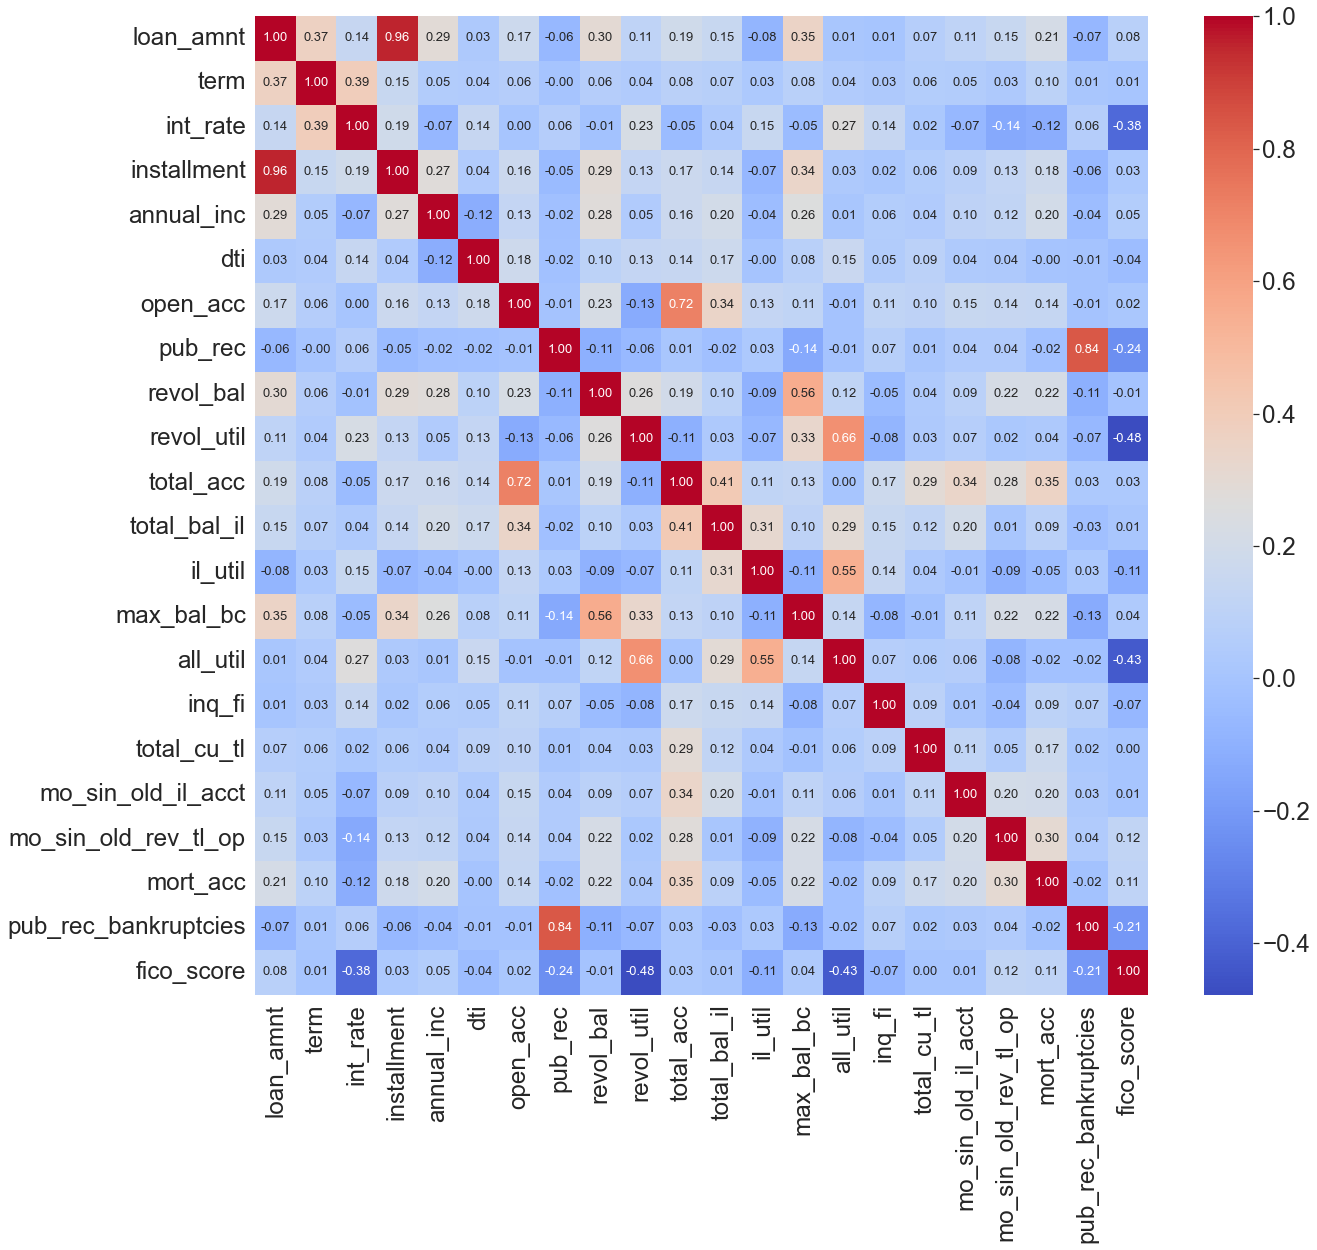

In [15]:
plt.figure(figsize = (20,18))
sns.set(font_scale = 2.2)
pearson_correlation = sns.heatmap(df[list_float].corr(), annot=True,
                      cmap = "coolwarm",
                      fmt=".2f",annot_kws={'size':13})
pearson_correlation.figure.savefig("../Figures/pearson_correlation.png") 

We see that *loan_amnt* and *installment* are highly correlated, which makes sense. Higher loan amount, more installment will be repaid each month. *loan_amnt* will be kept.  *pub_rec* and *pub_rec_bankruptcies* are highly correlated. I will keep *pub_rec_bankruptcies* only. 

In [16]:
drop_cols(['pub_rec','installment', 'open_acc'])

## 3. Outliers

For some important features, outliers may affect the final performance. I am going to check outliers for some important features one by one and decide whether to remove them.  

### 3.1 interest rate

<AxesSubplot:xlabel='int_rate'>

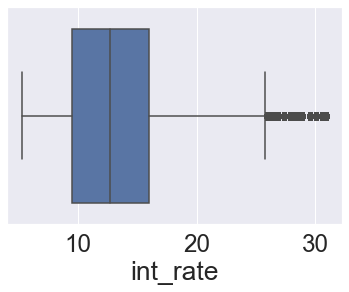

In [17]:
sns.boxplot(x = df['int_rate'])

In [18]:
outliers_to_null('int_rate',df)

### 3.2 dti

<AxesSubplot:xlabel='dti'>

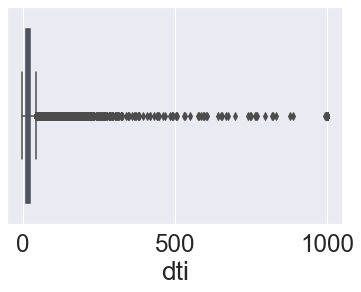

In [19]:
sns.boxplot(x = df['dti'])

In [20]:
outliers_to_null('dti',df)

### 3.3 loan amount

<AxesSubplot:xlabel='loan_amnt'>

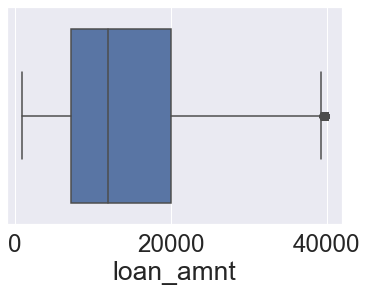

In [22]:
sns.boxplot(x = df['loan_amnt'])

In [23]:
outliers_to_null('loan_amnt',df)

### 3.4 annual income

<AxesSubplot:xlabel='annual_inc'>

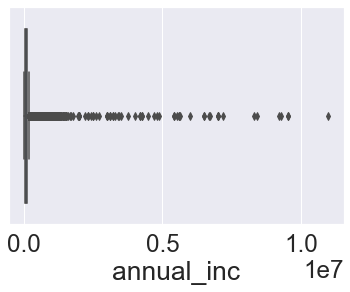

In [25]:
sns.boxplot(x = df['annual_inc'])

In [26]:
outliers_to_null('annual_inc', df)

### 3.5 fico score

<AxesSubplot:xlabel='fico_score'>

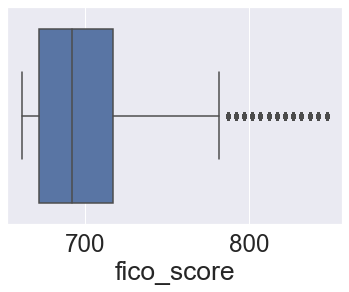

In [29]:
sns.boxplot(x = df['fico_score'])

In [30]:
outliers_to_null('fico_score', df)

In [31]:
df.isnull().sum()

loan_amnt                6815
term                        0
int_rate                16819
sub_grade                   0
home_ownership              0
annual_inc              24276
verification_status         0
loan_status                 0
purpose                     0
addr_state                  0
dti                      4845
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
total_bal_il                0
il_util                 69882
max_bal_bc                  0
all_util                    0
inq_fi                      0
total_cu_tl                 0
mo_sin_old_il_acct      13639
mo_sin_old_rev_tl_op        0
mort_acc                    0
pub_rec_bankruptcies        0
IssueDate                   0
fico_score              15122
dtype: int64

### 3.6 Remove Outliers 

In [32]:
df = df.dropna(axis=0, subset = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_score'])

## 4. Feature Engineering

### 4.1 Categorical Variables

In [33]:
dummy_list =['term', 'sub_grade','home_ownership','verification_status',
             'purpose','addr_state','initial_list_status']

In [34]:
df[dummy_list].isnull().any()

term                   False
sub_grade              False
home_ownership         False
verification_status    False
purpose                False
addr_state             False
initial_list_status    False
dtype: bool

In [35]:
df = pd.get_dummies(df, columns=dummy_list, drop_first=True)

In [36]:
df.shape

(454592, 118)

### 4.2 Train/Test Split

**1:Charged Off    0: Fully Paid**

In [37]:
df['loan_status'] = df['loan_status'].apply(lambda s: float(s == 'Charged Off'))

In [38]:
df['loan_status'].value_counts(normalize=False, dropna=False)

0.0    353734
1.0    100858
Name: loan_status, dtype: int64

In [39]:
df_train = df.loc[(df['IssueDate'] < '2018-01-01')]
df_test =  df.loc[(df['IssueDate'] > '2017-12-01')]

In [40]:
df_train = df_train.drop(labels='IssueDate', axis=1) 
df_test = df_test.drop(labels ='IssueDate', axis=1) 

### 4.3 Impute Missing Values

We will create an imputer object with the strategy set to median. We then train this object on the training data and uset it to fill in the missing values in both the training and testing data. This means that missing values in the test data are filled in with the corresponding median value from the training data. We do it this way to avoid the problem of test data leakage.

In [41]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(df_train)

# Transform both training and testing data
df_train = pd.DataFrame(imputer.transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

In [42]:
df_train.isnull().sum().sum()

0

In [43]:
df_test.isnull().sum().sum()

0

## 5. Short Summary

In [44]:
df_train.sample(5)

,loan_amnt,int_rate,annual_inc,loan_status,dti,revol_bal,revol_util,total_acc,total_bal_il,il_util,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
256507,7200.0,15.99,75000.0,0.0,18.96,19816.0,58.8,19.0,18973.0,79.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
202931,9000.0,9.75,22000.0,0.0,21.55,1531.0,11.3,25.0,6186.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
298471,15950.0,25.69,49920.0,1.0,28.03,19339.0,84.0,22.0,7373.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
354728,20000.0,9.93,84000.0,0.0,30.70,9285.0,25.6,31.0,41062.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
314335,3600.0,11.49,60000.0,0.0,7.04,8923.0,85.0,20.0,55253.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df.to_pickle('../Data/part2_clean_data_NO_outliers.pkl')  # where to save it, usually as a .pkl